# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

0. End-end scikit-learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve the model
6. Save and load the trained model
7. Putting it all together

In [1]:
    what_were_covering = ['0. End-end scikit-learn workflow', 
                      '1. Getting the data ready',
                      '2. Choose the right estimator/algorithm', 
                      '3. Fit the model/algorithm and use it to make predictions on our data',
                      '4. Evaluating a model',
                      '5. Improve the model',
                      '6. Save and load the trained model',
                      '7. Putting it all together']

In [2]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 0. An end-end Scikit-learn workflow

In [3]:
# 1. get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Create x (features matrix)
x = heart_disease.drop("target", axis =1)

# Create y (target column)
y = heart_disease["target"]

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

#We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# 3. Fit the default hyperparameters
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

In [8]:
import sklearn 
sklearn.show_versions()


System:
    python: 3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]
executable: /Users/louissayer/Documents/personal_coding/udemy_ml_course/env/bin/python
   machine: macOS-14.2.1-arm64-arm-64bit

Python dependencies:
      sklearn: 1.2.2
          pip: 23.3.1
   setuptools: 68.2.2
        numpy: 1.26.2
        scipy: 1.11.4
       Cython: None
       pandas: 2.1.4
   matplotlib: 3.8.0
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: /Users/louissayer/Documents/personal_coding/udemy_ml_course/env/lib/libopenblasp-r0.3.21.dylib
         prefix: libopenblas
       user_api: blas
   internal_api: openblas
        version: 0.3.21
    num_threads: 8
threading_layer: pthreads
   architecture: armv8

       filepath: /Users/louissayer/Documents/personal_coding/udemy_ml_course/env/lib/libomp.dylib
         prefix: libomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 8


In [9]:
clf.fit(x_train, y_train);

In [10]:
# Make a prediction

# y_label = clf.predict([0,2,3,4])

'''Gives error Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].'''

'Gives error Expected 2D array, got 1D array instead:\narray=[0. 2. 3. 4.].'

In [11]:
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [12]:
y_test

274    0
237    0
123    1
239    0
15     1
      ..
68     1
196    0
187    0
83     1
300    0
Name: target, Length: 61, dtype: int64

In [13]:
# Evaluate the model
clf.score(x_train, y_train)

1.0

In [14]:
clf.score(x_test, y_test)

0.7704918032786885

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        27
           1       0.81      0.76      0.79        34

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [16]:
confusion_matrix(y_test, y_preds)

array([[21,  6],
       [ 8, 26]])

In [17]:
accuracy_score(y_test, y_preds)

0.7704918032786885

In [18]:
# 5. Improve a model
# Try different number of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 75.41

Trying model with 20 estimators...
Model accuracy on test set: 81.97

Trying model with 30 estimators...
Model accuracy on test set: 80.33

Trying model with 40 estimators...
Model accuracy on test set: 80.33

Trying model with 50 estimators...
Model accuracy on test set: 77.05

Trying model with 60 estimators...
Model accuracy on test set: 80.33

Trying model with 70 estimators...
Model accuracy on test set: 78.69

Trying model with 80 estimators...
Model accuracy on test set: 78.69

Trying model with 90 estimators...
Model accuracy on test set: 75.41



In [19]:
# 6. Save a model and load it
import pickle 

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [20]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test,y_test)

0.7540983606557377

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
1. Split the data into features and variables (usually 'x' and 'y')
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numeric values to numeric values(feature encoding)

In [21]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
x = heart_disease.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [25]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [26]:
x.shape

(303, 13)

In [27]:
len(heart_disease)

303

### 1.1 Make sure all the data is numerical 

In [28]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [29]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [30]:
len(car_sales)

1000

In [31]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [32]:
# Split into x/y
X = car_sales.drop("Price", axis=1)
Y = car_sales["Price"]

# split into training and test set
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [33]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
'''model.fit(x_train,y_train)  #Gives error: ValueError: could not convert string to float: 'Toyota'
model.score(x_test, y_test)''' 

"model.fit(x_train,y_train)  #Gives error: ValueError: could not convert string to float: 'Toyota'\nmodel.score(x_test, y_test)"

In [34]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(X)   
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [35]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [36]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [37]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, Y, test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
model.score(X_test, y_test)

0.3235867221569877

## 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [39]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [40]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
# Create X and y 
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [42]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(X)   
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [43]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option 1: Fill missing data with Pandas

In [44]:

car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the 'colour' column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the odometer column 
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

#Fill the "Doors" column 
car_sales_missing["Doors"].fillna(4, inplace=True)

In [45]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [46]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [47]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [48]:
len(car_sales_missing)

950

In [49]:
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

In [50]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)   
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-learn

In [51]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [52]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [53]:
car_sales_missing.dropna(subset=["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [54]:
# Split into X and Y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [55]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns 
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([("cat_imputer", cat_imputer, cat_features),
                             ("door_imputer", door_imputer, door_feature),
                             ("num_imputer", num_imputer, num_features)
                            ])
# Transform the data 
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [56]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [57]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)   
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [58]:
# Now we've got our data as numbers and filled (not missing)
# Let's fit the model 
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

## Choosing the right estimator/alogorithm for your problem

some things to note:

* Sklearn refers to machine learning models, algorithms as estimators
* Classification problem - prediciting a category (heart disease or not)
* Sometime you'll see clf (shoft for classifier) used as a classification estimator
* Regression problem -predicting a number (selling a car)

Machine learning map to determine which algorithm to use: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html



## 2.1 Picking a machine learning model for regression problem

Let's use the California Housing dataset

In [59]:
# Get california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [60]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [61]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [62]:
#housing_df = housing_df.drop("MedHouseVal", axis=1)

In [63]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [64]:
# Import algorithm
from sklearn.linear_model import Ridge

# Setup random seed 
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,00

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

#Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440126

In [65]:
# Trying a different model: the lasso model

# Import algorithm/estimator
from sklearn.linear_model import Lasso

#setup random seed
np.random.seed(42)

#Instantiate and fit the model (on the training set)
model = Lasso()
model.fit(X_train, y_train)

#Check the score of the model (on the test set)
model.score(X_test, y_test)

0.28416718210084113

What if 'Ridge' didn't work or the score didn't fit our needs?

We can always refer to a different model

How about we try an ensemble model ( an ensemble model is a combintation of smaller models try and make better predictions than just a single model)?

Sklearn's models can be found here

In [66]:
#Import the RnadomForestRegressor from the Ensemble model
from sklearn.ensemble import RandomForestRegressor

#Setup random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

#Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8059809073051385

In [67]:
print(model.n_features_in_)

8


## 2.2 Picking a machine learning model for a classification problem

In [68]:
#Trying to make my own classification model from the sklearn wine dataset

#Import the dataset
from sklearn.datasets import load_wine 
wine = load_wine()
print(wine.DESCR)
print(wine)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [69]:
# Loading the data into a dataframe
wine_df = pd.DataFrame(wine["data"], columns = wine['feature_names'])
#Loading the target values
wine_df["target"] = wine["target"]
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [70]:
#Creating variables for the features and target data
x = wine_df.drop("target", axis=1)
y = wine_df["target"]

#Splitting the data into feature, target: train, test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Import the support vector machine 
from sklearn import svm

#define the classifier
clf = svm.SVC()

#Fit the model
clf.fit(x_train,y_train)

#Check the model score
clf.score(x_test, y_test)



0.75

In [71]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
len(heart_disease)

303

Consulting the map and it says to try LinearSVC

In [73]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup the random seed
np.random.seed(42)

#Make the data 
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate LinearSVC
clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

#Evaluate the LinearSVC
clf.score(X_test,y_test)


0.8688524590163934

In [74]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [75]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup the random seed
np.random.seed(42)

#Make the data 
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#Evaluate the RandomForestClassifier
clf.score(X_test,y_test)

0.8524590163934426

# Tidbit:
1. If you have structured data 
2. If you have unstructured data, use deep learning or transfer learning

In [76]:
what_were_covering

['0. End-end scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve the model',
 '6. Save and load the trained model',
 '7. Putting it all together']

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

* `X` = features, feature variables, data
* `y` = labels, targets, target variables

In [77]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup the random seed
np.random.seed(42)

#Make the data 
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#Evaluate the RandomForestClassifier
clf.score(X_test,y_test)

0.8524590163934426

In [78]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [79]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions
1. `predict()`
2. `predict_proba()`

In [80]:
# Use a trained model to make predictions
#clf.predict(np.array([1,7,8,3,4]))

In [81]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [82]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [83]:
#Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [84]:
clf.score(X_test, y_test)

0.8524590163934426

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [86]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [87]:
#Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

`predict()` can also be used for regression models

In [88]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [89]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data 

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Create model instance
model = RandomForestRegressor(n_estimators=100)

#Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [90]:
y_preds[:10]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  , 1.6580801,
       2.34237  , 1.66708  , 2.5609601, 4.8519781])

In [91]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [92]:
#compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3270458119670544

In [93]:
len(y_preds)

4128

In [94]:
xnew = [[8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23]]
ynew = model.predict(xnew)
ynew

array([4.2620928])

## 4. Evaluating a machine learning model

There are three ways to evaluate Scikit-learn models/estimators:
1. Estimator's built-in `Score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

You can read more about these here:  https://scikit-learn.org/stable/modules/model_evaluation.html 

### 4.1 Evaluating the model with the `score` method

In [95]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease_df = pd.DataFrame(heart_disease)

X = heart_disease_df.drop("target", axis=1)
y = heart_disease_df["target"]

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

# Create classifier model instance
model = RandomForestClassifier(n_estimators=100)

# Fit classifier to training data
model.fit(X_train, y_train)

# Score the model
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.8524590163934426
1.0


Let's use the `score` method on our regression problem

### 4.2 Evaluating a model using the `scoring` parameter       

In [96]:
from sklearn.model_selection import cross_val_score

np.random.seed(42)

# Create X and y
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease_df = pd.DataFrame(heart_disease)

X = heart_disease_df.drop("target", axis=1)
y = heart_disease_df["target"]

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

# Create classifier model instance
model = RandomForestClassifier(n_estimators=100)

# Fit classifier to training data
model.fit(X_train, y_train);

In [97]:
clf.score(X_test, y_test)


0.8524590163934426

In [98]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [99]:
np.random.seed(42)
# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

#Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X, y))

# Compare the two, 
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [100]:
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease_df.drop("target", axis=1)
y = heart_disease_df["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [102]:
np.mean(cross_val_score)

0.8248087431693989

In [103]:
print(f"Heart disease Classifier Cross-Validated Accuracy: {(np.mean(cross_val_score)*100).round(2)}%")

Heart disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve(AUC/ROC)**

* Area under curve(AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's model false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [104]:
# Create X test... etc
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [105]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.11, 0.89],
       [0.3 , 0.7 ],
       [0.98, 0.02],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [106]:
y_probs_positive = y_probs[:, 1]

In [107]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.06896552, 0.10344828, 0.13793103,
       0.13793103, 0.13793103, 0.20689655, 0.20689655, 0.20689655,
       0.27586207, 0.37931034, 0.37931034, 0.48275862, 0.48275862,
       0.55172414, 0.55172414, 0.5862069 , 0.65517241, 0.82758621,
       0.89655172, 1.        ])

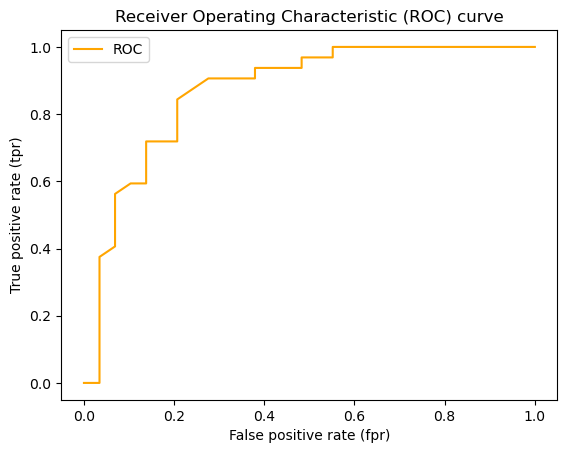

In [108]:
#Create a function for plottig ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve give the false positive rate (fpr)
    and true positive rate (tpr) of a model. 
    '''
    #Plot the ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    #plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guessing')

    #Customise the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Characteristic (ROC) curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [109]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8696120689655172

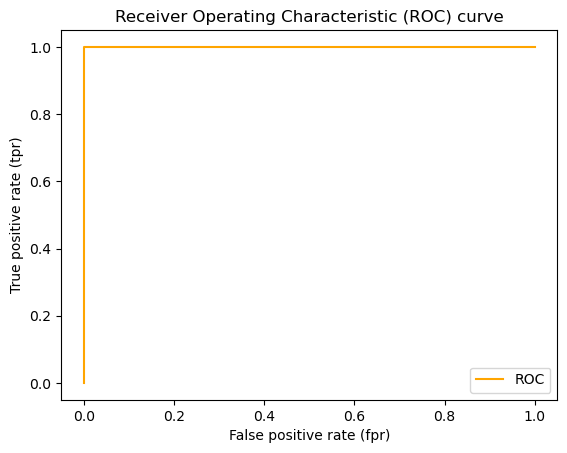

In [110]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [111]:
# Perfect AUC score
roc_auc_score(y_test, y_test)


1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 

In essence, giving you an idea of where the model is getting confused. 

In [112]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [113]:
#Visualise confusion with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], 
            colnames=["Predicted Labels"])


Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [114]:
23 + 6 + 6 + 26

61

In [115]:
# How to install a conda package into the current environment from a Jupyter Notebook
#import sys
#!conda install --yes --prefix {sys.prefix} seaborn

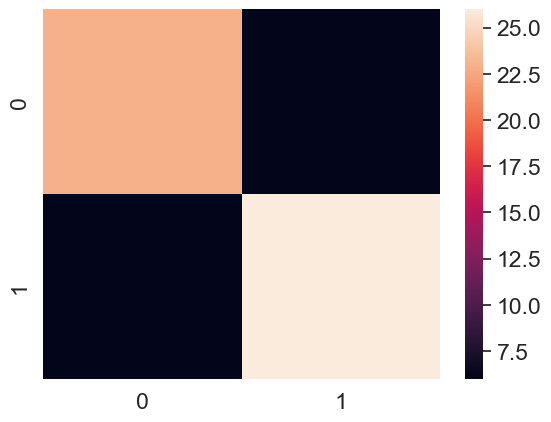

In [116]:
# Make our confusion matrix more visible with Seaborn heatmap()
import seaborn as sns

#Set the font scale 
sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat);

In [117]:
sklearn.__version__

'1.2.2'

In [118]:
clf

RandomForestClassifier()

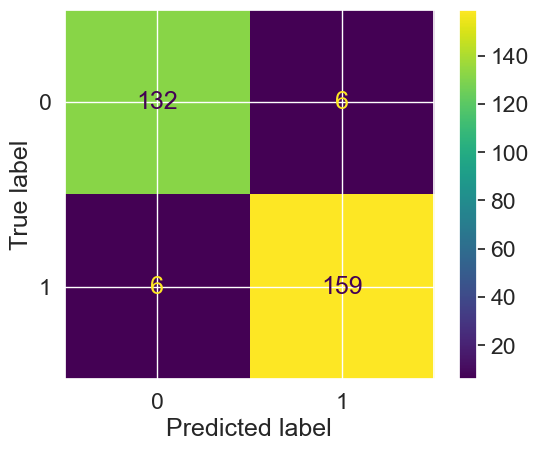

In [119]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

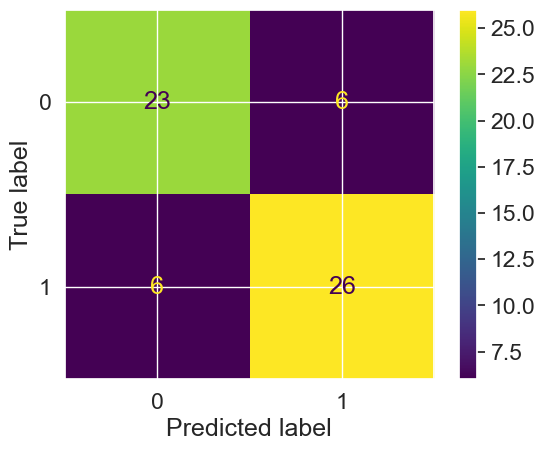

In [120]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

**Classification Report**

In [121]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [122]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarise classification metrics:
* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled 0 or 1).
*  **Precision** and **recall** become more important when classes are imbalanced.
* If false positives predictions are worse than false negatives, aim for higher precision
* If flase negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall. 

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we are going to cover are 
1. R^2 coefficient of determination
2. Mean absolute eror (MAE)
3. Mean squared error (MSE)

What r_squared does. Compares tour model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers, its R^2 value would be 1

In [123]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,00

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

#Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8059809073051385

In [124]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [125]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [126]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [127]:
r2_score(y_test, y_test_mean)

0.0

In [128]:
r2_score(y_test, y_test)

1.0

**Mean absolute error(MAE)**

MAE is the average of the absolute differences between predictions and actual values. 

It gives you an idea of how wrong your model's predictions are. 

In [129]:
#MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3270458119670544

In [130]:
df = pd.DataFrame(data={"actual values": y_test, "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
20046,0.47700,0.490580,0.013580
3024,0.45800,0.759890,0.301890
15663,5.00001,4.935016,-0.064994
20484,2.18600,2.558640,0.372640
9814,2.78000,2.334610,-0.445390
...,...,...,...
15362,2.63300,2.225000,-0.408000
16623,2.66800,1.972540,-0.695460
18086,5.00001,4.853989,-0.146021
2144,0.72300,0.714910,-0.008090


In [131]:
#MAE using formulas and differences
np.abs(df["differences"]).mean()

0.3270458119670544

**Mean squared error (MSE)**
MSE is the mean of the square off the errors between actual and predicted values. 

In [132]:
#Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2542443610174998

In [133]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.490580,0.013580,0.000184
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


### 4.2.3 Finally using the `scoring` parameter

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [135]:
np.random.seed(42)

#Cross-validation accuracy 
cv_acc = cross_val_score(clf, X, y , cv=5, scoring = None) # if scoring=None, estimator's default scoring evaluation metric is used (accuracy for classification models)
cv_acc 

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [136]:
# Cross-validated accuracy 
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%") # x100 and to 2 decimal places

The cross-validated accuracy is: 82.48%


In [143]:
#Precision 
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y , cv=5, scoring = "precision") # if scoring=None, estimator's default scoring evaluation metric is used (accuracy for classification models)
cv_precision
np.mean(cv_precision)

0.8329547346025924

Let's see the `scoring` parameter for regression models 

In [145]:
np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,00

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model (on the training set)
model = RandomForestRegressor()

cv_neg_mse = cross_val_score(model, X, y , cv=3, scoring = "neg_mean_squared_error") 

In [146]:
cv_neg_mse

array([-0.51161907, -0.32881306, -0.53746865])

## 4.3 Using different evaluation metrics as Sciki-learn functions

The 3rd way to evaluate sciki-learn machine learning models/estimators is to use the `sklearn.metrics` module

In [157]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

accuracy_score(y_test, y_preds)

0.819672131147541

In [156]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,00

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model (on the training set)
model = RandomForestRegressor()

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

r2_score(y_test, y_preds)

0.8092683938484266